В одной компании произошла неприятность: случился потоп, в бумажных анкетах клиентов размыло некоторые строки и в 1000 анкетах пострадало поле “gender”. Конечно, их было бы можно восстановить, но в компании решили автоматизировать решение проблемы и определить пол клиентов по фотографиям. Был создан датасет gender.csv, в котором записаны признаки человека на фото и его пол.

Первые 1000 значений имеют пропуски в столбце gender.

Все столбцы с ".1" в названии дублируют предыдущие столбцы без ".1", но содержат уникальные значения

Необходимо произвести чистку данных.

Определите пол по остальным параметрам из выборки для первой тысячи значений и прикрепите его в CSV формате. Файл должен содержать только прогнозные значения в формате "Male"/"Female", в одном столбце без заголовка.

Пороговое значение для данной задачи классификации считать равным 0.5.

Поля
- index	индексы записей
- long_hair	длинные волосы у человека или нет
- forehead_width_cm	ширина лба справа налево в см.
- forehead_height_cm	ширина лба в см от места роста волос до бровей.
- forehead_width_mm	ширина лба справа налево в мм.
- forehead_width_conventional_units	ширина лба справа налево в стандартизованном виде. Значения forehead_width_mm преобразованы в диапазон от 0 до 1.
- nose_wide	широкий нос или нет. 1 означает широкий, а 0 - нет.
- nose_long	длинный нос или нет. 1 означает длинный, а 0 - нет.
- lips_thin	есть ли у этого человека тонкая губа или нет. 1 означает тонкая, а 0 - нет.
- distance_nose_to_lip_long	расстояние от носа до губы. 1 означает большое, а 0 - небольшое.
- gender	Либо мужчина ("Male"), либо женщина ("Female")

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Данные

In [12]:
data = pd.read_csv('gender(1).csv')

In [13]:
pd.set_option('display.max_columns', None)

In [14]:
data

,Unnamed: 0,index,long_hair,forehead_width_cm,forehead_height_cm,forehead_width_mm,forehead_width_conventional_units,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender,index.1,long_hair.1,forehead_width_cm.1,forehead_height_cm.1,forehead_width_mm.1,forehead_width_conventional_units.1,nose_wide.1,nose_long.1,lips_thin.1,distance_nose_to_lip_long.1,gender.1
0,0,0,0.704275,11.8,6.1,118.0,0.025806,0.895614,0.477485,0.841261,0.902628,NaN,2515,0.818018,11.5,5.8,115.0,0.006452,0.137806,0.402620,0.167844,0.188913,Female
1,1,1,0.118690,14.0,5.4,140.0,0.167742,0.202520,0.186825,0.719697,0.309122,NaN,2516,0.995941,15.2,5.8,152.0,0.245161,0.570656,0.980237,0.811487,0.967540,Male
2,2,2,0.203894,11.8,6.3,118.0,0.025806,0.892793,0.723152,0.725821,0.720640,NaN,2517,0.633806,15.4,5.7,154.0,0.258065,0.709777,0.365825,0.933026,0.646992,Male
3,3,3,0.386228,14.4,6.1,144.0,0.193548,0.024963,0.562005,0.831515,0.770379,NaN,2518,0.795792,13.0,6.9,130.0,0.103226,0.883454,0.399733,0.595028,0.822491,Male
4,4,4,0.564020,13.5,5.9,135.0,0.135484,0.415389,0.063705,0.211584,0.157217,NaN,2519,0.915185,14.2,5.8,142.0,0.180645,0.652973,0.735543,0.553571,0.532910,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2510,2510,2510,0.915744,13.9,6.4,139.0,0.161290,0.604791,0.851645,0.766959,0.763820,Male,4996,0.645930,13.6,5.1,136.0,0.141935,0.443641,0.255464,0.116379,0.042459,Female
2511,2511,2511,0.820041,13.8,5.1,138.0,0.154839,0.933549,0.537350,0.918460,0.938982,Male,4997,0.501251,11.9,5.4,119.0,0.032258,0.473038,0.469482,0.067636,0.210801,Female
2512,2512,2512,0.659143,12.2,5.3,122.0,0.051613,0.531385,0.456792,0.489438,0.457138,Female,4998,0.701357,12.9,5.7,129.0,0.096774,0.388300,0.428321,0.322559,0.199743,Female
2513,2513,2513,0.664928,12.1,5.2,121.0,0.045161,0.538634,0.610885,0.977585,0.942940,Male,4999,0.684078,13.2,6.2,132.0,0.116129,0.067981,0.167563,0.218222,0.370723,Female


In [15]:
np.array_equal(data.index.values, data['Unnamed: 0'].values)

True

In [16]:
data = data.drop('Unnamed: 0', axis=1)

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2515 entries, 0 to 2514
Data columns (total 22 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   index                                2515 non-null   int64  
 1   long_hair                            2515 non-null   float64
 2   forehead_width_cm                    2515 non-null   float64
 3   forehead_height_cm                   2515 non-null   float64
 4   forehead_width_mm                    2515 non-null   float64
 5   forehead_width_conventional_units    2515 non-null   float64
 6   nose_wide                            2515 non-null   float64
 7   nose_long                            2515 non-null   float64
 8   lips_thin                            2515 non-null   float64
 9   distance_nose_to_lip_long            2515 non-null   float64
 10  gender                               1514 non-null   object 
 11  index.1                       

Объеденим данные в одну таблицу

In [18]:
df1 = data.iloc[:, :11]
df1.head()

,index,long_hair,forehead_width_cm,forehead_height_cm,forehead_width_mm,forehead_width_conventional_units,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,0,0.704275,11.8,6.1,118.0,0.025806,0.895614,0.477485,0.841261,0.902628,NaN
1,1,0.118690,14.0,5.4,140.0,0.167742,0.202520,0.186825,0.719697,0.309122,NaN
2,2,0.203894,11.8,6.3,118.0,0.025806,0.892793,0.723152,0.725821,0.720640,NaN
3,3,0.386228,14.4,6.1,144.0,0.193548,0.024963,0.562005,0.831515,0.770379,NaN
4,4,0.564020,13.5,5.9,135.0,0.135484,0.415389,0.063705,0.211584,0.157217,NaN


In [19]:
df2 = data.iloc[:, 11:]
df2.columns = df1.columns
df2.tail()

,index,long_hair,forehead_width_cm,forehead_height_cm,forehead_width_mm,forehead_width_conventional_units,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
2510,4996,0.645930,13.6,5.1,136.0,0.141935,0.443641,0.255464,0.116379,0.042459,Female
2511,4997,0.501251,11.9,5.4,119.0,0.032258,0.473038,0.469482,0.067636,0.210801,Female
2512,4998,0.701357,12.9,5.7,129.0,0.096774,0.388300,0.428321,0.322559,0.199743,Female
2513,4999,0.684078,13.2,6.2,132.0,0.116129,0.067981,0.167563,0.218222,0.370723,Female
2514,5000,0.794726,15.4,5.4,154.0,0.258065,0.812078,0.956397,0.692107,0.531950,Male


In [20]:
df = pd.concat([df1, df2], axis=0, ignore_index=True)
df

,index,long_hair,forehead_width_cm,forehead_height_cm,forehead_width_mm,forehead_width_conventional_units,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,0,0.704275,11.8,6.1,118.0,0.025806,0.895614,0.477485,0.841261,0.902628,NaN
1,1,0.118690,14.0,5.4,140.0,0.167742,0.202520,0.186825,0.719697,0.309122,NaN
2,2,0.203894,11.8,6.3,118.0,0.025806,0.892793,0.723152,0.725821,0.720640,NaN
3,3,0.386228,14.4,6.1,144.0,0.193548,0.024963,0.562005,0.831515,0.770379,NaN
4,4,0.564020,13.5,5.9,135.0,0.135484,0.415389,0.063705,0.211584,0.157217,NaN
...,...,...,...,...,...,...,...,...,...,...,...
5025,4996,0.645930,13.6,5.1,136.0,0.141935,0.443641,0.255464,0.116379,0.042459,Female
5026,4997,0.501251,11.9,5.4,119.0,0.032258,0.473038,0.469482,0.067636,0.210801,Female
5027,4998,0.701357,12.9,5.7,129.0,0.096774,0.388300,0.428321,0.322559,0.199743,Female
5028,4999,0.684078,13.2,6.2,132.0,0.116129,0.067981,0.167563,0.218222,0.370723,Female


Удалим строки, в которых только NaN

In [21]:
df.isnull().sum(axis=1).value_counts()

0     4000
1     1001
10      29
dtype: int64

In [22]:
idx_null = df.isnull().sum(axis=1)[df.isnull().sum(axis=1) == 10].index
idx_null

Int64Index([3000, 3001, 3002, 3003, 3004, 3005, 3006, 3007, 3008, 3009, 3010,
            3011, 3012, 3013, 3014, 3015, 3016, 3017, 3018, 3019, 3020, 3021,
            3022, 3023, 3024, 3025, 3026, 3027, 3028],
           dtype='int64')

In [23]:
df.iloc[idx_null]

,index,long_hair,forehead_width_cm,forehead_height_cm,forehead_width_mm,forehead_width_conventional_units,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
3000,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3001,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3002,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3003,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3004,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3005,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3006,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3007,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3008,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3009,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
df = df.drop(idx_null, axis=0)
df.shape

(5001, 11)

In [25]:
df.isnull().sum(axis=1).value_counts()

0    4000
1    1001
dtype: int64

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5001 entries, 0 to 5029
Data columns (total 11 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   index                              5001 non-null   int64  
 1   long_hair                          5001 non-null   float64
 2   forehead_width_cm                  5001 non-null   float64
 3   forehead_height_cm                 5001 non-null   float64
 4   forehead_width_mm                  5001 non-null   float64
 5   forehead_width_conventional_units  5001 non-null   float64
 6   nose_wide                          5001 non-null   float64
 7   nose_long                          5001 non-null   float64
 8   lips_thin                          5001 non-null   float64
 9   distance_nose_to_lip_long          5001 non-null   float64
 10  gender                             4000 non-null   object 
dtypes: float64(9), int64(1), object(1)
memory usage: 468.8+ 

датасет сбалансированный

In [27]:
df['gender'].value_counts()

Female    2006
Male      1994
Name: gender, dtype: int64

# Обработка признаков

In [29]:
def hist_by_sex(feature, df=df):
    plt.figure(figsize=(20,6))
    plt.subplot(1,2,1)
    df[df['gender']=='Male'][feature].hist()
    plt.title('Male')
    plt.subplot(1,2,2)
    df[df['gender']=='Female'][feature].hist()
    plt.title('Female')
    plt.show()

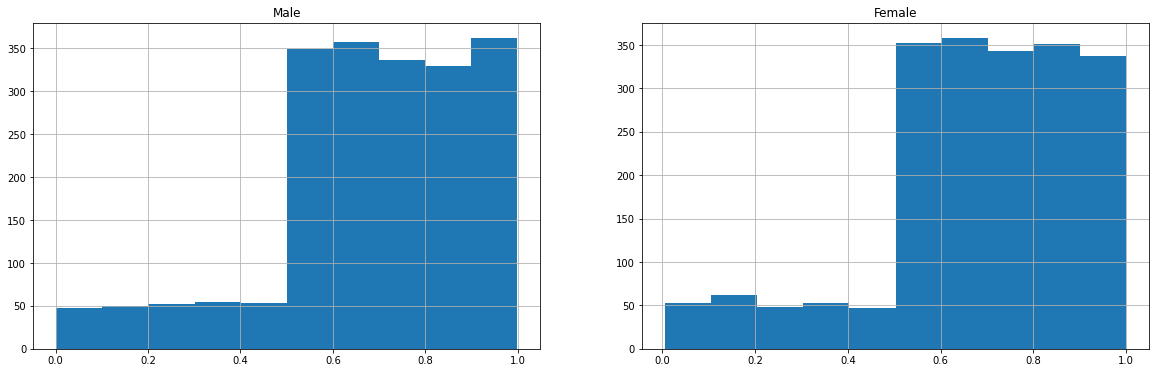

In [30]:
hist_by_sex('long_hair')

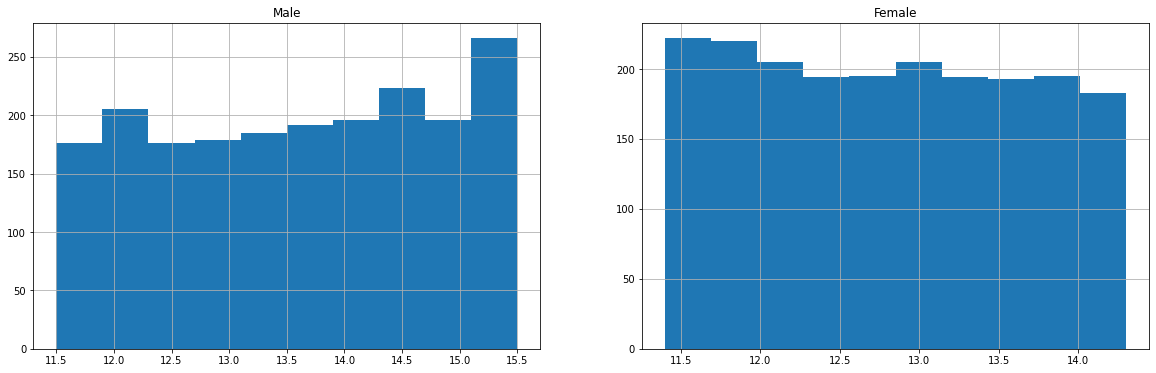

In [31]:
hist_by_sex('forehead_width_cm')

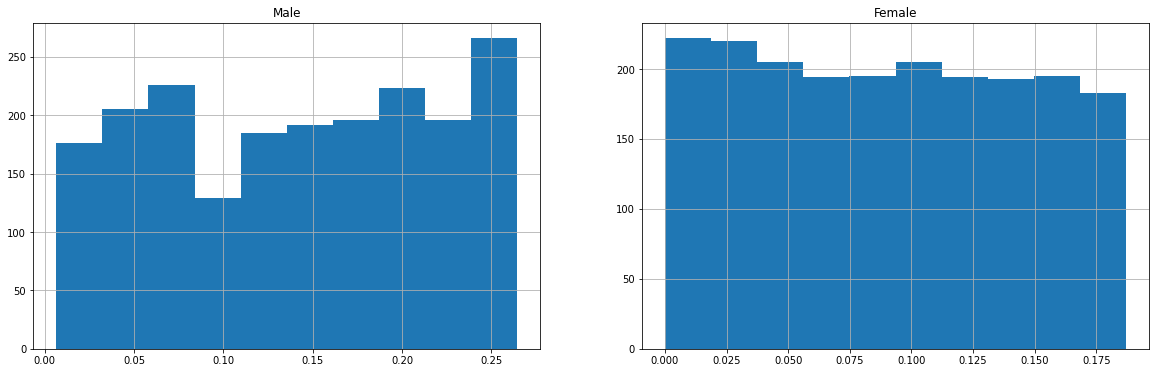

In [32]:
hist_by_sex('forehead_width_conventional_units')

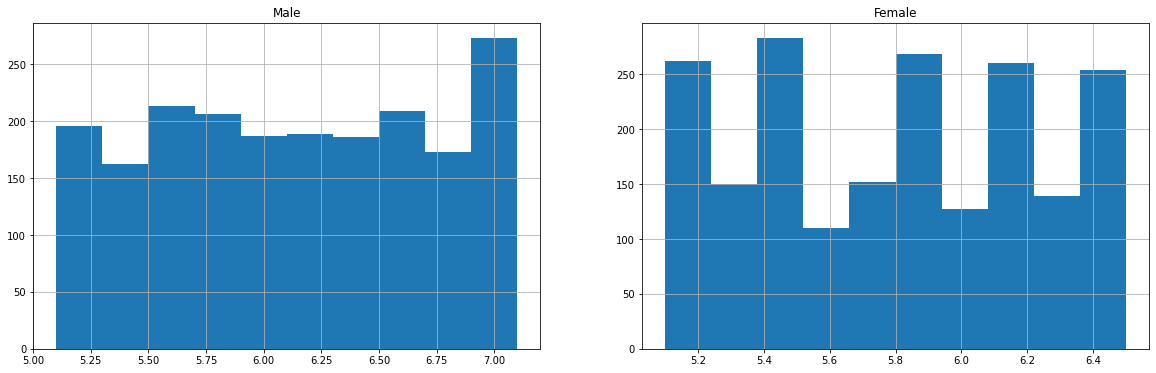

In [33]:
hist_by_sex('forehead_height_cm')

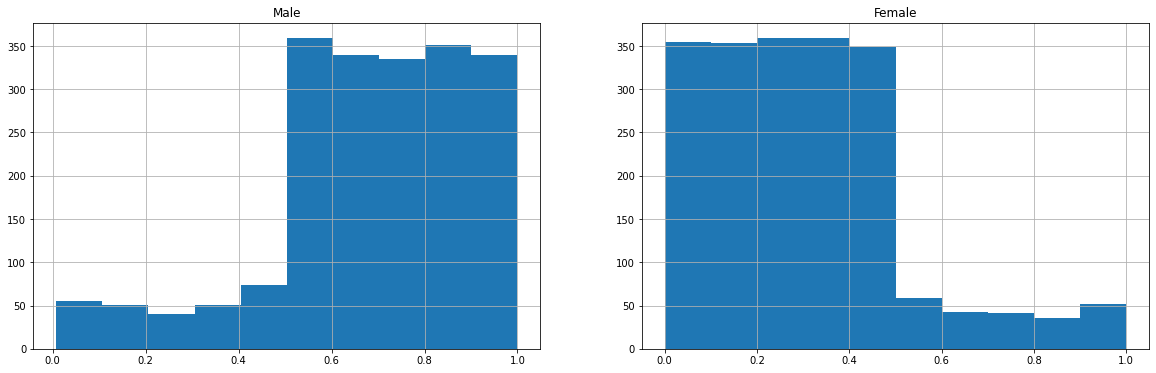

In [34]:
hist_by_sex('nose_wide')

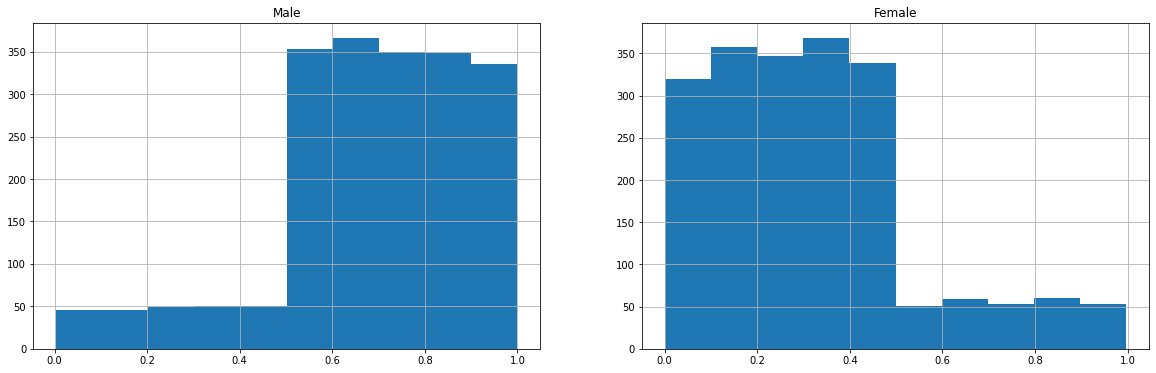

In [35]:
hist_by_sex('nose_long')

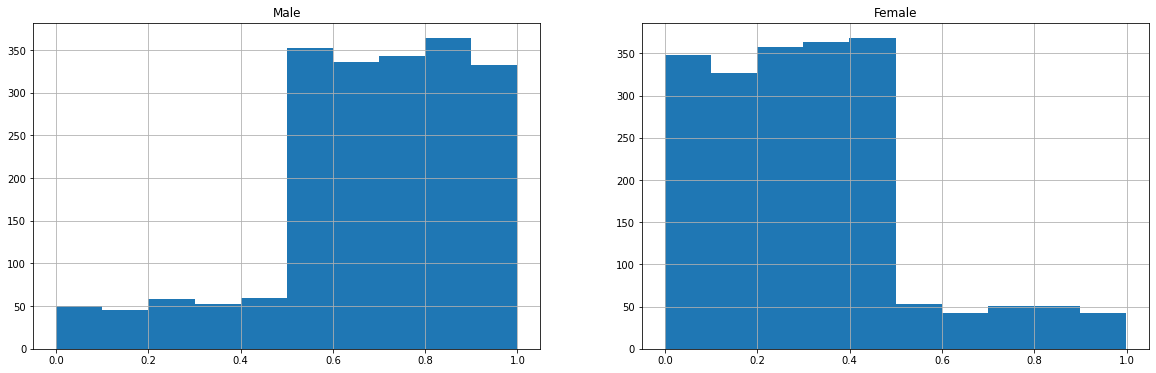

In [36]:
hist_by_sex('lips_thin')

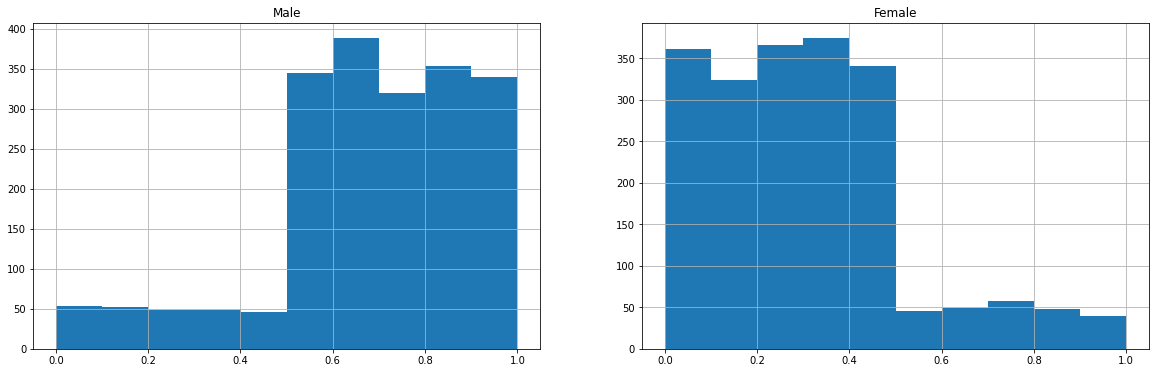

In [37]:
hist_by_sex('distance_nose_to_lip_long')

Из гистограмм признаков видно, что некоторые признаки имеют почти равномерное распределение при значениях больше или меньше 0.5. Имеет смысл привести их к 0 или 1.

In [38]:
feats_0_1 = ['long_hair', 'nose_wide', 'nose_long', 'lips_thin', 'distance_nose_to_lip_long']
for feat in feats_0_1:
    df[feat+'_'] = df[feat].apply(lambda x: 0 if x<0.5 else 1)

In [39]:
df = df.drop('forehead_width_mm', axis=1)

In [41]:
df.head()

,index,long_hair,forehead_width_cm,forehead_height_cm,forehead_width_conventional_units,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender,long_hair_,nose_wide_,nose_long_,lips_thin_,distance_nose_to_lip_long_
0,0,0.704275,11.8,6.1,0.025806,0.895614,0.477485,0.841261,0.902628,NaN,1,1,0,1,1
1,1,0.118690,14.0,5.4,0.167742,0.202520,0.186825,0.719697,0.309122,NaN,0,0,0,1,0
2,2,0.203894,11.8,6.3,0.025806,0.892793,0.723152,0.725821,0.720640,NaN,0,1,1,1,1
3,3,0.386228,14.4,6.1,0.193548,0.024963,0.562005,0.831515,0.770379,NaN,0,0,1,1,1
4,4,0.564020,13.5,5.9,0.135484,0.415389,0.063705,0.211584,0.157217,NaN,1,0,0,0,0


In [44]:
feats_0_1_ = [x+'_' for x in feats_0_1]
feats_0_1_

['long_hair_',
 'nose_wide_',
 'nose_long_',
 'lips_thin_',
 'distance_nose_to_lip_long_']

В качестве нового признака возьмем среднее всех пирзнаков, которые до этого привели к 0/1. 

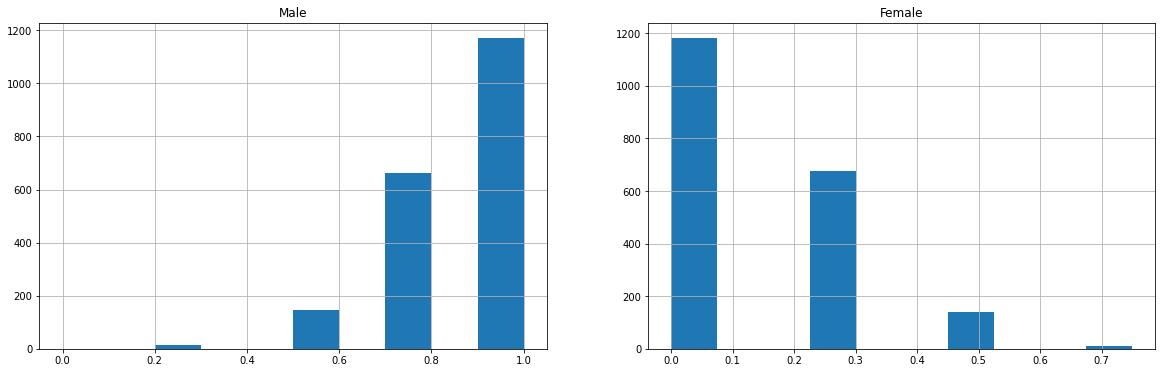

In [56]:
df['0-1_mean'] = df[feats_0_1_[1:]].mean(axis=1)
hist_by_sex('0-1_mean', df)

Оставшиеся количественные признаки 'forehead_width_cm', 'forehead_height_cm' стандартизируем.

In [59]:
for feat in ['forehead_width_cm', 'forehead_height_cm']:
    df[feat+'_norm'] = (df[feat]-df[feat].mean())/df[feat].std()
df.head()

,index,long_hair,forehead_width_cm,forehead_height_cm,forehead_width_conventional_units,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender,long_hair_,nose_wide_,nose_long_,lips_thin_,distance_nose_to_lip_long_,0-1_mean,forehead_width_norm,forehead_width_cm_norm,forehead_height_cm_norm
0,0,0.704275,11.8,6.1,0.025806,0.895614,0.477485,0.841261,0.902628,NaN,1,1,0,1,1,0.75,-1.247808,-1.247808,0.283943
1,1,0.118690,14.0,5.4,0.167742,0.202520,0.186825,0.719697,0.309122,NaN,0,0,0,1,0,0.25,0.739315,0.739315,-1.009317
2,2,0.203894,11.8,6.3,0.025806,0.892793,0.723152,0.725821,0.720640,NaN,0,1,1,1,1,1.00,-1.247808,-1.247808,0.653446
3,3,0.386228,14.4,6.1,0.193548,0.024963,0.562005,0.831515,0.770379,NaN,0,0,1,1,1,0.75,1.100610,1.100610,0.283943
4,4,0.564020,13.5,5.9,0.135484,0.415389,0.063705,0.211584,0.157217,NaN,1,0,0,0,0,0.00,0.287696,0.287696,-0.085560


Зависимую категориальную переменную пол переведем в численные значения 0/1.

In [60]:
df['gender_0-1'] = df['gender'].map({'Male': 1, 'Female': 0, None: None})

In [61]:
df.iloc[1100:1105]

,index,long_hair,forehead_width_cm,forehead_height_cm,forehead_width_conventional_units,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender,long_hair_,nose_wide_,nose_long_,lips_thin_,distance_nose_to_lip_long_,0-1_mean,forehead_width_norm,forehead_width_cm_norm,forehead_height_cm_norm,gender_0-1
1100,1100,0.515702,12.1,5.9,0.045161,0.476678,0.104198,0.071598,0.326367,Female,1,0,0,0,0,0.00,-0.976837,-0.976837,-0.085560,0.0
1101,1101,0.969869,14.3,5.1,0.187097,0.914139,0.296687,0.654716,0.516043,Male,1,1,0,1,1,0.75,1.010286,1.010286,-1.563571,1.0
1102,1102,0.922619,15.4,6.9,0.258065,0.603979,0.718473,0.491502,0.664591,Male,1,1,1,0,1,0.75,2.003848,2.003848,1.761954,1.0
1103,1103,0.883432,11.9,5.5,0.032258,0.346971,0.138184,0.214530,0.289670,Female,1,0,0,0,0,0.00,-1.157484,-1.157484,-0.824565,0.0
1104,1104,0.759919,14.0,7.0,0.167742,0.501372,0.049477,0.393862,0.875229,Male,1,1,0,0,1,0.50,0.739315,0.739315,1.946706,1.0


## Моделирование

Построим простейшую линейную регрессию над тремя признаками.

In [98]:
from sklearn.model_selection import train_test_split, cross_validate, cross_val_score
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay

In [63]:
df_train = df[~df['gender'].isnull()].copy()
df_test = df[df['gender'].isnull()].copy()

In [66]:
features = ['0-1_mean', 'forehead_width_norm', 'forehead_height_cm_norm']

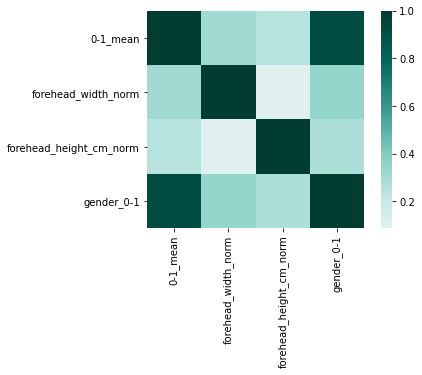

In [67]:
sns.heatmap(df[features+['gender_0-1']].corr(method='pearson'), center=0, square=True, cmap="BrBG")
plt.show()

По матрице корреляций видно, что с таргетом неплохо коррелируют все переменные, особенно '0-1_mean'. При этом между собой признаки не скоррелированны.

In [75]:
X_train, X_val, y_train, y_val = train_test_split(df_train[features].values, df_train['gender_0-1'].values, test_size=0.2)
print(X_train.shape)
print(X_val.shape)
print(y_train.shape)
print(y_val.shape)

(3200, 3)
(800, 3)
(3200,)
(800,)


In [81]:
lr = LinearRegression()
lr.fit(X=X_train, y=y_train)

LinearRegression()

In [82]:
lr.coef_

array([1.07960155, 0.02848586, 0.02621369])

In [83]:
y_pred_train = lr.predict(X_train)
y_pred_val = lr.predict(X_val)

In [84]:
y_pred_train_01 = (y_pred_train>0.5).astype(int)
y_pred_val_01 = (y_pred_val>0.5).astype(int)

In [102]:
confusion_matrix(y_train, y_pred_train_01)[0]

array([1547,   45], dtype=int64)

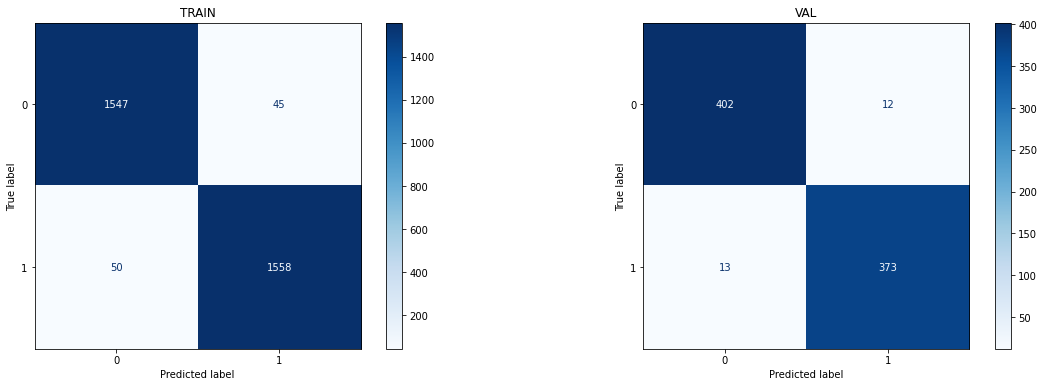

In [111]:
fig, ax = plt.subplots(1,2, figsize=(20,6))
ConfusionMatrixDisplay(confusion_matrix(y_train, y_pred_train_01)).plot(ax=ax[0], cmap='Blues');
ax[0].set_title('TRAIN')
ConfusionMatrixDisplay(confusion_matrix(y_val, y_pred_val_01)).plot(ax=ax[1], cmap='Blues');
ax[1].set_title('VAL')
plt.show()

In [89]:
print('Accuracy: ')
print('Train  : ', accuracy_score(y_train, y_pred_train_01))
print('Val    : ', accuracy_score(y_val, y_pred_val_01))
print('Precision: ')
print('Train  : ', precision_score(y_train, y_pred_train_01))
print('Val    : ', precision_score(y_val, y_pred_val_01))
print('Recall: ')
print('Train  : ', recall_score(y_train, y_pred_train_01))
print('Val    : ', recall_score(y_val, y_pred_val_01))

Accuracy: 
Train  :  0.9703125
Val    :  0.96875
Precision: 
Train  :  0.9719276356830941
Val    :  0.9688311688311688
Recall: 
Train  :  0.9689054726368159
Val    :  0.966321243523316


Линейная регрессия с порогом дает неплохой результат.

Сделаем предсказание для тестовой выборки и отправим результат

In [112]:
df_test[features].head()

,0-1_mean,forehead_width_norm,forehead_height_cm_norm
0,0.75,-1.247808,0.283943
1,0.25,0.739315,-1.009317
2,1.00,-1.247808,0.653446
3,0.75,1.100610,0.283943
4,0.00,0.287696,-0.085560


In [113]:
y_pred = lr.predict(df_test[features].values)
y_pred

array([0.74348601, 0.22638904, 1.02307243, ..., 0.75604788, 1.08830486,
       1.05576515])

In [114]:
df_test_result = df_test.copy()
df_test_result['gender_0-1'] = (y_pred>0.5).astype(int)
df_test_result['gender_result'] = df_test_result['gender_0-1'].replace({0: 'Female', 1: 'Male'})

In [310]:
answer = df_test_result['gender_result'].values
answer

array(['Male', 'Female', 'Male', ..., 'Male', 'Male', 'Male'],
      dtype=object)

In [313]:
df_test_result['gender_result'].to_csv("answer.csv", header=None, index=None)

<img src='gender_final.PNG'>